<a href="https://colab.research.google.com/github/SDS-AAU/IntroStat/blob/master/Notebooks/S5_data_manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Missing data

Indtil videre har vi slettet observationer med missing data. Men der nogle andre muligheder.

In [69]:
import pandas as pd

In [70]:
titanic = pd.read_excel('https://github.com/SDS-AAU/IntroStat/raw/master/Data/titanic.xlsx')

In [71]:
# nem måde at se hvor mange der mangler og hvor
titanic.isnull().sum()

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Unnamed: 13    177
dtype: int64

In [72]:
# brug gennemsnit som "filler" 
titanic.Age.fillna(titanic.Age.mean(), inplace=True)

Hvis man vil gøre noget mere avanceret, så skal man se på imputation:

https://pypi.org/project/fancyimpute/

https://kearnz.github.io/autoimpute-tutorials/

Mere om det fx her: https://medium.com/@Cambridge_Spark/tutorial-introduction-to-missing-data-imputation-4912b51c34eb

## Tidsserier

Når man arbejder med tidsserier er det en god idé at lære hvordan man laver "resampling" dvs groupby i tidsdimensionen

In [73]:
!pip install yfinance

In [74]:
import yfinance as yf  
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()



*   iShares Global Clean Energy UCITS ETF USD (Dist) (IQQH.DE)
*   iShares Healthcare Innovation UCITS ETF USD (Acc) (2B78.DE)
*   iShares Automation & Robotics UCITS ETF USD (Acc) (2B76.DE)




In [75]:
data = yf.download('2B76.DE 2B78.DE IQQH.DE','2019-01-01','2020-09-21')

[*********************100%***********************]  3 of 3 completed


In [76]:
data

Adj Close                   Close  ...    Open  Volume                  
             2B76.DE 2B78.DE IQQH.DE 2B76.DE  ... IQQH.DE 2B76.DE 2B78.DE   IQQH.DE
Date                                          ...                                  
2019-01-02     5.432   5.209  4.2650   5.432  ...  4.1375  466946   36514   54235.0
2019-01-03     5.299   5.118  4.2140   5.299  ...  4.2075  672145   32471   14663.0
2019-01-04     5.392   5.267  4.2825   5.392  ...  4.2200  444764   28982   10346.0
2019-01-07     5.468   5.334  4.3070   5.468  ...  4.3265  331552   43752  158245.0
2019-01-08     5.493   5.342  4.3295   5.493  ...  4.3395  449999   35437   58517.0
...              ...     ...     ...     ...  ...     ...     ...     ...       ...
2020-09-04     7.897   6.705     NaN   7.897  ...     NaN  343083  145200       NaN
2020-09-08     7.915   6.776     NaN   7.915  ...     NaN  480757  374350       NaN
2020-09-09     7.988   6.890     NaN   7.988  ...     NaN  343931  106450       NaN
2020-09-10     8.003   6.859     NaN   8.003  ...     NaN  238602  125586       NaN
2020-09-11     7.957   6.848     NaN   7.957  ...     NaN  270901   74956       NaN

[412 rows x 18 columns]

In [79]:
data['Adj Close'].diff().corr()

,2B76.DE,2B78.DE,IQQH.DE
2B76.DE,1.000000,0.830522,0.799967
2B78.DE,0.830522,1.000000,0.778263
IQQH.DE,0.799967,0.778263,1.000000


In [80]:
data_diff = data['Adj Close'].diff()

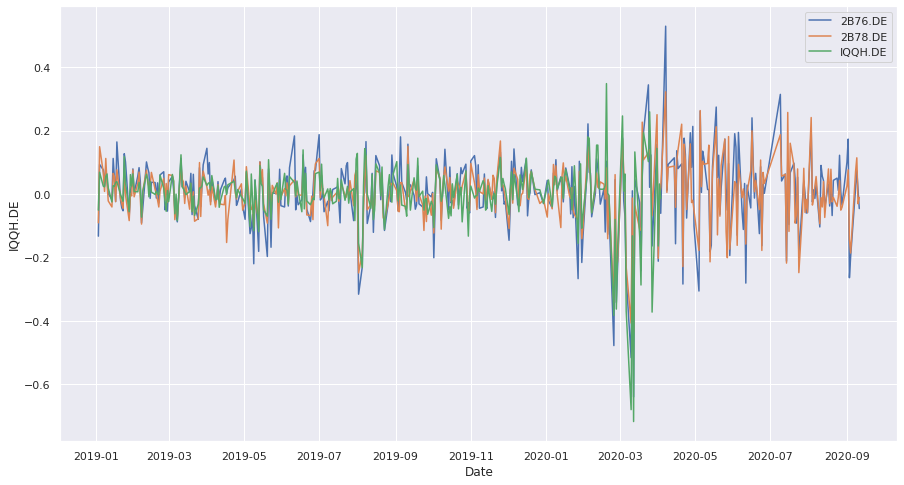

In [81]:
plt.figure(figsize=(15,8))
sns.lineplot(x=data_diff.index, y="2B76.DE", data=data_diff,label="2B76.DE")
sns.lineplot(x=data_diff.index, y="2B78.DE", data=data_diff,label="2B78.DE")
sns.lineplot(x=data_diff.index, y="IQQH.DE", data=data_diff,label="IQQH.DE")

In [84]:
# Vi kan beregne gennemsnit / uge
data_diff = data_diff.resample('M').mean()

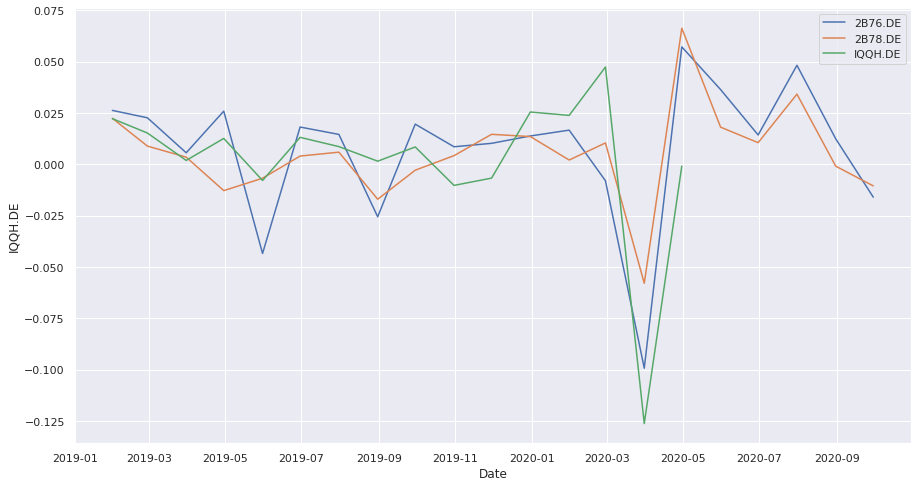

In [85]:
plt.figure(figsize=(15,8))
sns.lineplot(x=data_diff.index, y="2B76.DE", data=data_diff,label="2B76.DE")
sns.lineplot(x=data_diff.index, y="2B78.DE", data=data_diff,label="2B78.DE")
sns.lineplot(x=data_diff.index, y="IQQH.DE", data=data_diff,label="IQQH.DE")

## Join's

Indtil videre har vi set på enkelte datasæt. I den "rigtige verden" arbejder man typisk med data fra flere kilder, hvor der er relationer mellem observationer på forskellige niveau.

Eksempel fra: Python Data Science Handbook 

In [86]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})

In [87]:
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [88]:
df2

,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [89]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [90]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})

In [91]:
df4

,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


In [92]:
pd.merge(df3, df4)

,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


In [93]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})

In [94]:
df5

,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets
5,HR,organization


In [95]:
pd.merge(df1, df5)

,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


In [96]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})

In [97]:
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [98]:
df3

,name,salary
0,Bob,70000
1,Jake,80000
2,Lisa,120000
3,Sue,90000


In [99]:
pd.merge(df1, df3, left_on="employee", right_on="name")

,employee,group,name,salary
0,Bob,Accounting,Bob,70000
1,Jake,Engineering,Jake,80000
2,Lisa,Engineering,Lisa,120000
3,Sue,HR,Sue,90000


# Databehandling - Master-opgave

Du har 2 datasæt fra https://nomadlist.com



*   Trips: ~46k rejser af user på platformen:  https://sds-aau.github.io/SDS-master/M1/data/trips.csv
*   People: data om ~4k user:  https://sds-aau.github.io/SDS-master/M1/data/people.csv

Find 5 spørgsmål i gruppen og passende løsninger.
fx: Har rejsende, som er iværksætter længere eller kortere trips gennemsnitlig?

OBS: Det er ikke pæne data men faktisk nogle "rigtige data" og dermed er der masser af udfordringer.
Når du laver timestamps fra start-dato og end-dato skal du bruge "coerce" errors for at undgå problemer med manglende data.
Nogle af de dato, der angives passer slet ikke (17 århundrede)